<a href="https://colab.research.google.com/github/Nice9115/SmartBin_AI/blob/main/SmartBin_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smart Bin Project – AI Waste Classification
## Task 2: Deep Learning with TensorFlow
**Goal**: Classify waste from images (plastic, glass, paper, etc.)

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
# STEP 1: Unzip the uploaded file (FIXED FILENAME)
!unzip -q "/Garbage classification.zip"
print("Unzipped successfully!")

Unzipped successfully!


In [10]:
# STEP 1: Check folders (USE EXACT NAME FROM !ls)
!ls -d "Garbage classification"/*

'Garbage classification/cardboard'  'Garbage classification/paper'
'Garbage classification/glass'	    'Garbage classification/plastic'
'Garbage classification/metal'	    'Garbage classification/trash'


In [11]:
# STEP 2: Load images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    'Garbage classification',  # ← EXACT FOLDER NAME
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'Garbage classification',  # ← SAME HERE
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


In [12]:
# STEP 3: Build and train CNN
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training Smart Bin AI... (1-2 minutes)")
history = model.fit(train_gen, epochs=5, validation_data=val_gen)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Smart Bin AI... (1-2 minutes)
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 158ms/step - accuracy: 0.2734 - loss: 2.5882 - val_accuracy: 0.3837 - val_loss: 1.5753
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.4780 - loss: 1.2799 - val_accuracy: 0.4354 - val_loss: 1.4165
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.6439 - loss: 1.0146 - val_accuracy: 0.4930 - val_loss: 1.3539
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.6995 - loss: 0.8454 - val_accuracy: 0.4612 - val_loss: 1.4173
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.7498 - loss: 0.7388 - val_accuracy: 0.5229 - val_loss: 1.4286


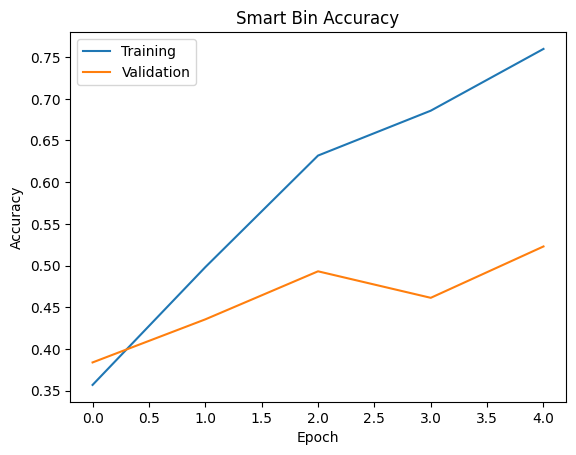

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Smart Bin Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


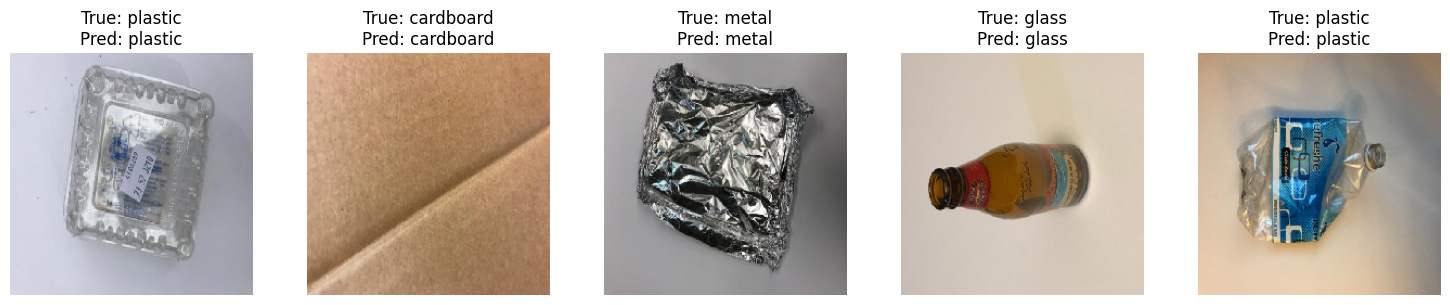

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import random
import os

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    folder = random.choice(class_names)
    img_name = random.choice(os.listdir(f'Garbage classification/{folder}'))
    img_path = f'Garbage classification/{folder}/{img_name}'

    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    predicted_class = class_names[np.argmax(pred)]

    axes[i].imshow(img)
    axes[i].set_title(f"True: {folder}\nPred: {predicted_class}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()